In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab inline
figsize(20, 10)

Populating the interactive namespace from numpy and matplotlib


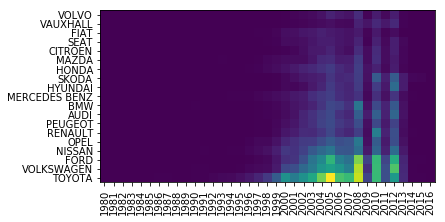

In [2]:
df = pd.read_csv("Make Model Data 2016.csv", encoding='utf-8')

# Get the top 20 makes of car. [::-1] reverses the order of the list - this makes the plot look better
top20makes = df.groupby('VehicleMake')['Total'].sum().sort_values(ascending=False)[:19].index[::-1]


# Create a new df with the makes as indeces and years as the columns and a N/A value of 0
df3 = df.groupby(['VehicleMake', 'YearOfBirth'])['PASS'].sum().to_frame().unstack().fillna(0)['PASS']

# Remove columns for year of births before 2000
for y in [ x for x in df3.columns if x < 1980]:
    del(df3[y])
    
#for y in [ x for x in df3.columns if x > 2012]:
#    del(df3[y])

# select only the rows that match the top 20 makes
df3 = df3.loc[top20makes,]

# At this point we can do a simple heatmap. Though we need to label the tics 
plt.xticks(range(len(df3.columns)),list(df3.columns), rotation=90)
plt.yticks(range(len(df3.index)),list(df3.index))
plt.imshow(df3)


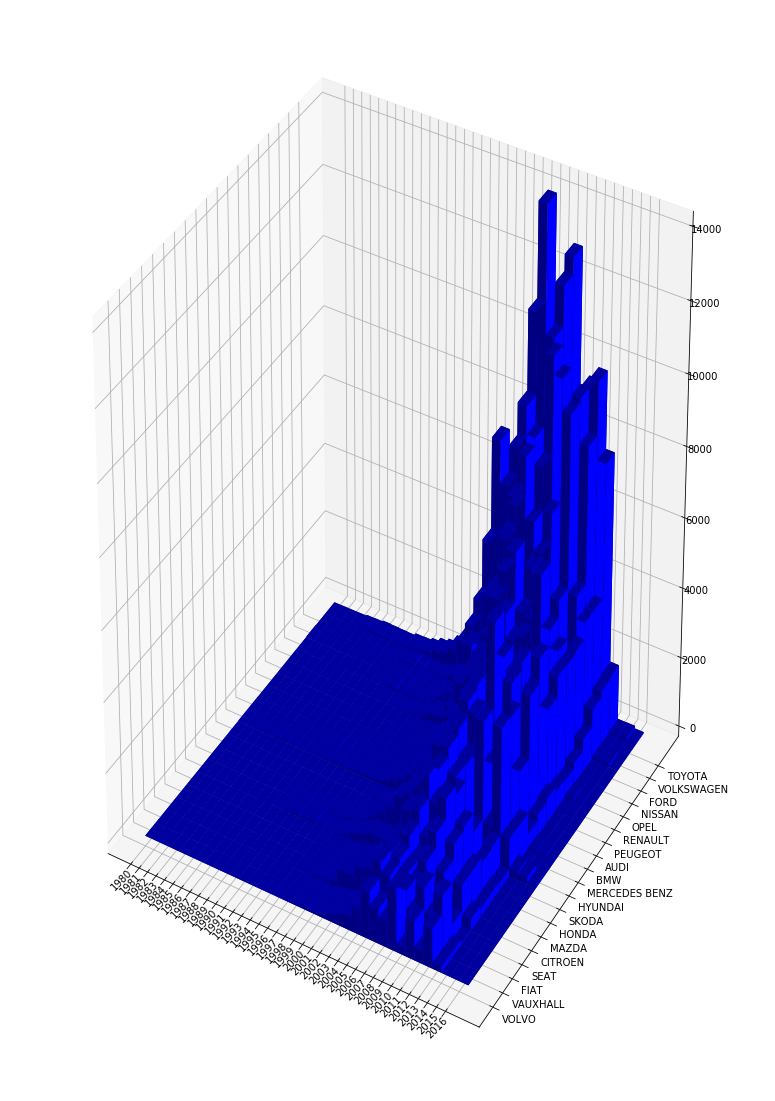

In [3]:
# For the bar plot we're entering the realm of matplotlib for the visualisation.

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(121, projection='3d')

# Create the x,y 2d matrix
_x = np.arange(df3.shape[1])
_y = np.arange(df3.shape[0])
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

# Get the z values, basically the data in the dataframe
top = [j for i in df3.values for j in i]

# the z axis should start at 0, and the bars should be 1x1
bottom = np.zeros_like(top)
width = 1
depth = 1

# Add the x & tics and labels
# Create as many x & y tics as we have labels
ax.set_xticks(np.arange(len(df3.columns)))
ax.set_yticks(np.arange(len(df3.index)))
# Display the labels where they look right
ax.set_xticklabels(df3.columns, rotation=45, va='bottom',  rotation_mode="anchor")                
ax.set_yticklabels(list(df3.index),rotation=0, ha='left',  rotation_mode="anchor")
ax.yaxis.set_ticks_position('top')

ax.bar3d(x, y, bottom, width, depth, top, color='b', shade=True, alpha=1, zsort='max')
